# Lab KF5 - Radiation in the environment

*This document is to help you perform the analysis. In order to save changes that you make, remember to save the document before closing it! You may include it as an appendix to your lab reports and it will not counts towards the max. 10 pages limit* 

**In the code cells, whenever you see the comment " -> TODO <- " This means that you need to edit or add something to that row in the code. Read the relevant comment which follows.**

### Importing python packages <a name="import"></a>

In [26]:
#This code cell holds useful code neede for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  
import pandas as pd

# math
from math import sqrt

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib widget

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'xtick.labelsize': 'large'})
plt.rcParams.update({'ytick.labelsize': 'large'})

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# For uncertainties calculations
from uncertainties import ufloat, ufloat_fromstr, unumpy
from uncertainties.umath import * # sin(), etc...

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions

# Part 1: Ambient dose measurement

Please estimate **properly** the average of your measurements. You can refer to the `Uncertainties` Jyputer notebook on how to avegare quantities which include _different_ uncertainties.
 

## Task 1.3 Analysis of the dose measurement results 

In [27]:
#-> TODO <- Compute the average of the Ambient dose measurements for each location.
#           Do you use weighted or 'regular' average? Why?

def avg_weight(to_be_avg):
	"""
	weighted average: add the values and divided by the number of values.
	"""
	num = 0
	den = 0
	for val in to_be_avg:
		num += val.n / val.s**2
		den +=     1 / val.s**2
		
	mean = num/den
	sigma = np.sqrt( 1 / den )
	avg_weight = ufloat( mean, sigma )
	return avg_weight

inside = [ufloat(0.01, 0.001), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.04, 0.004), 
		  ufloat(0.1, 0.01),
		  ufloat(0.01, 0.001)]

outside = [ufloat(0.01, 0.001), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.05, 0.005),
		  ufloat(0.02, 0.002)]


print('controls')
print('PED+')
print(f'inside = {avg_weight(inside)} uSv/h and {avg_weight(inside) * 8765.81277} uSv/yr')
print(f'outside = {avg_weight(outside)} uSv/h and {avg_weight(outside) * 8765.81277} uSv/yr')

print('RNI')
print(f'inside = {ufloat(0.12, 0.12*0.2)} uSv/h and {ufloat(0.12, 0.12*0.2) * 8765.81277} uSv/yr')
print(f'outside = {ufloat(0.08, 0.08*0.2)} uSv/h and {ufloat(0.08, 0.08*0.2) * 8765.81277} uSv/yr')
print('----------')

parking_ped = avg_weight([ufloat(0.06, 0.006), 
		  ufloat(0.04, 0.004), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.01, 0.001),
		  ufloat(0.01, 0.001)])

lux_study_ped = avg_weight([ufloat(0.05, 0.005), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.04, 0.004), 
		  ufloat(0.09, 0.009),
		  ufloat(0.01, 0.001)])

lux_outside_ped = avg_weight([ufloat(0.01, 0.001), 
		  ufloat(0.01, 0.001), 
		  ufloat(0.04, 0.004), 
		  ufloat(0.07, 0.007),
		  ufloat(0.03, 0.003)])

pub_ped = avg_weight([ufloat(0.03, 0.003), 
		  ufloat(0.03, 0.003), 
		  ufloat(0.03, 0.003), 
		  ufloat(0.01, 0.001),
		  ufloat(0.03, 0.003)])

parking_rni = ufloat(0.06, 0.06*0.2)
lux_study_rni = ufloat(0.18, 0.18*0.2)
lux_outside_rni = ufloat(0.13, 0.13*0.2)
pub_rni = ufloat(0.12, 0.12*0.2)


print('PED+')
print(f'Parking spot = {parking_ped} uSv/h and {parking_ped * 8765.81277} uSv/yr')
print(f'Lux study room = {lux_study_ped} uSv/h and {lux_study_ped * 8765.81277} uSv/yr')
print(f'Lux outside = {lux_outside_ped} uSv/h and {lux_outside_ped * 8765.81277} uSv/yr')
print(f'Pub Rydberg = {pub_ped} uSv/h and {pub_ped * 8765.81277} uSv/yr')

print('RNI')
print(f'Parking spot = {parking_rni} uSv/h and {parking_rni * 8765.81277} uSv/yr')
print(f'Lux study room = {lux_study_rni} uSv/h and {lux_study_rni * 8765.81277} uSv/yr')
print(f'Lux outside = {lux_outside_rni} uSv/h and {lux_outside_rni * 8765.81277} uSv/yr')
print(f'Pub Rydberg = {pub_rni} uSv/h and {pub_rni * 8765.81277} uSv/yr')
print('----------')

controls
PED+
inside = 0.0109+/-0.0006 uSv/h and 96+/-5 uSv/yr
outside = 0.0112+/-0.0006 uSv/h and 99+/-5 uSv/yr
RNI
inside = 0.120+/-0.024 uSv/h and (1.05+/-0.21)e+03 uSv/yr
outside = 0.080+/-0.016 uSv/h and (7.0+/-1.4)e+02 uSv/yr
----------
PED+
Parking spot = 0.0111+/-0.0006 uSv/h and 97+/-5 uSv/yr
Lux study room = 0.0121+/-0.0007 uSv/h and 106+/-6 uSv/yr
Lux outside = 0.0124+/-0.0007 uSv/h and 109+/-6 uSv/yr
Pub Rydberg = 0.0162+/-0.0008 uSv/h and 142+/-7 uSv/yr
RNI
Parking spot = 0.060+/-0.012 uSv/h and (5.3+/-1.1)e+02 uSv/yr
Lux study room = 0.18+/-0.04 uSv/h and (1.58+/-0.32)e+03 uSv/yr
Lux outside = 0.130+/-0.026 uSv/h and (1.14+/-0.23)e+03 uSv/yr
Pub Rydberg = 0.120+/-0.024 uSv/h and (1.05+/-0.21)e+03 uSv/yr
----------


In [28]:
#-> TODO <- Compute the annual effective dose rate [mSv/y] on each location

In [29]:
#-> TODO <- Estimate the contribution from radon (%) to the dose you measured indoors. 

radon_activity_7 = 2 #Bq/m3 average over the last 7 days
radon_activity_1 = 7 #Bq/m3 average over the last 1 day
radon_activity_start = 1 #Bq/m3 average since course start
Bq_to_uSv = 6.7e-3
print(radon_activity_7 * Bq_to_uSv * 8765.81277)
print(radon_activity_1 * Bq_to_uSv * 8765.81277)
print(radon_activity_start * Bq_to_uSv * 8765.81277)

117.46189111800001
411.1166189130001
58.730945559000006


# Part 2 : $\alpha$ Spectrometry

## Task 2.2: Calibrate Detector

### Step 7: Import your data and plot the spectrum in Jupyter Notebook

In [30]:
#Load your data files here:
Th228_data = MCA.load_spectrum("../data/Th228.Spe") #-> TODO <- Insert the name of your data file. Source: Th-228

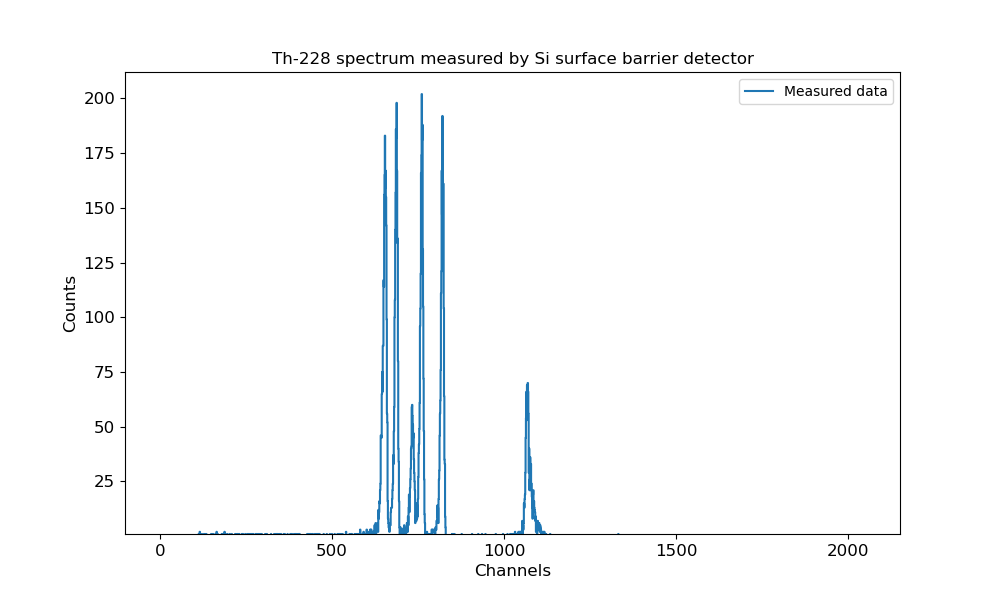

In [31]:
#Execute this cell to make plot of Th-228 spectra

#### NO NEED TO EDIT ####
plt.figure(0, figsize=(10, 6)) #make figure for Th-228 data.
plt.step(Th228_data.bin_centers, Th228_data.counts, where='mid', label='Measured data') #make a stepped plot
plt.title("Th-228 spectrum measured by Si surface barrier detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.yscale('linear')          # show the y-axis in logarithmic scale
plt.ylim(ymin=1)           # used to limit the minimum value shown on the y-axis
plt.legend()
plt.savefig("calibration_spectrum.pdf") #This is how you can save the figure
plt.show()

#########################

### Step 8: Fit a Gaussian function to the relevant peaks and save the centroid values (we will use these for calibration in the next task).

A gaussian function looks like this:
$$G(x) = A\cdot e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where
- $A$ is a constant determing the amplitude of the peak, 
- $\mu$ is the mean value of the peak (centroid),
- $\sigma$ is the standard diviation of the peak (width of the peak).

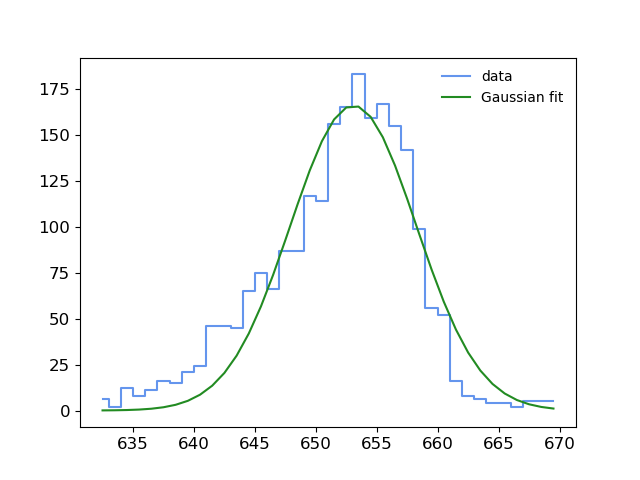

Estimated parameters:
 A = 166.04316, mu = 653.07794,  sigma = 5.16972 

Uncertainties in the estimated parameters: 
 σ²(A) = 46.96834, σ²(mu) = 0.06070, σ²(sigma) = 0.06073 

Covariance matrix: 
 [[ 4.69683359e+01 -1.16382932e-04  9.75192124e-01]
 [-1.16382932e-04  6.07038376e-02 -8.01711980e-06]
 [ 9.75192124e-01 -8.01711980e-06  6.07282942e-02]]


In [32]:
# Fitting the 1st peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Th228 = fittingFunctions.perform_Gaussian_fit(x=Th228_data.bin_centers, # your x data 
											  y=Th228_data.counts,           # your y data 
											  region_start=632,   # -> TODO <- Insert channel number from where to START fitting.
											  region_stop=670,    # -> TODO <- Insert channel number from where to STOP fitting.
											  mu_guess=652,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=165,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=20)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

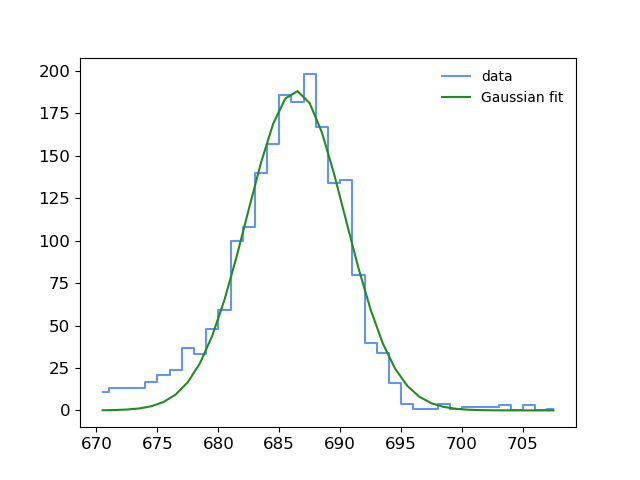

Estimated parameters:
 A = 188.21129, mu = 686.37498,  sigma = 4.03006 

Uncertainties in the estimated parameters: 
 σ²(A) = 22.79585, σ²(mu) = 0.01394, σ²(sigma) = 0.01394 

Covariance matrix: 
 [[ 2.27958502e+01  9.97284965e-07 -3.25410125e-01]
 [ 9.97284965e-07  1.39356122e-02 -2.54554640e-08]
 [-3.25410125e-01 -2.54554640e-08  1.39356426e-02]]


In [33]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Ra224 = fittingFunctions.perform_Gaussian_fit(x=Th228_data.bin_centers, # your x data 
											  y=Th228_data.counts,           # your y data 
											  region_start=670,   # -> TODO <- Insert channel number from where to START fitting.
											  region_stop=708,    # -> TODO <- Insert channel number from where to STOP fitting.
											  mu_guess=687,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=198,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=20)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

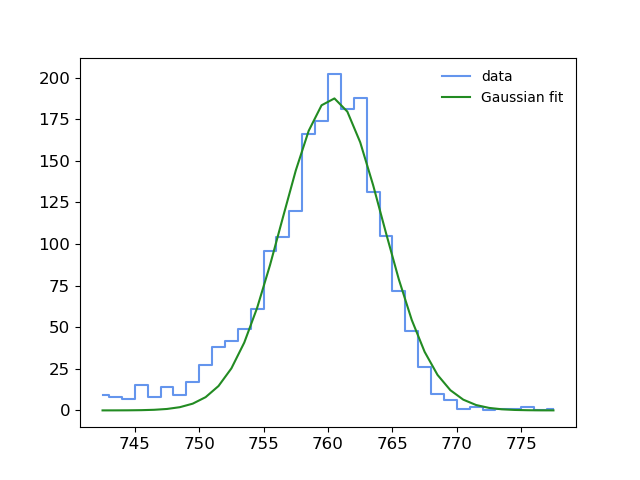

Estimated parameters:
 A = 187.71149, mu = 760.33985,  sigma = 3.91381 

Uncertainties in the estimated parameters: 
 σ²(A) = 28.49004, σ²(mu) = 0.01651, σ²(sigma) = 0.01651 

Covariance matrix: 
 [[2.84900436e+01 1.14162832e-06 3.96016845e-01]
 [1.14162832e-06 1.65141185e-02 2.37139804e-08]
 [3.96016845e-01 2.37139804e-08 1.65141200e-02]]


In [34]:
# Fitting the 3rd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn220 = fittingFunctions.perform_Gaussian_fit(x=Th228_data.bin_centers, # your x data 
											  y=Th228_data.counts,           # your y data 
											  region_start=742,   # -> TODO <- Insert channel number from where to START fitting.
											  region_stop=778,    # -> TODO <- Insert channel number from where to STOP fitting.
											  mu_guess=760,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=200,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=20)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

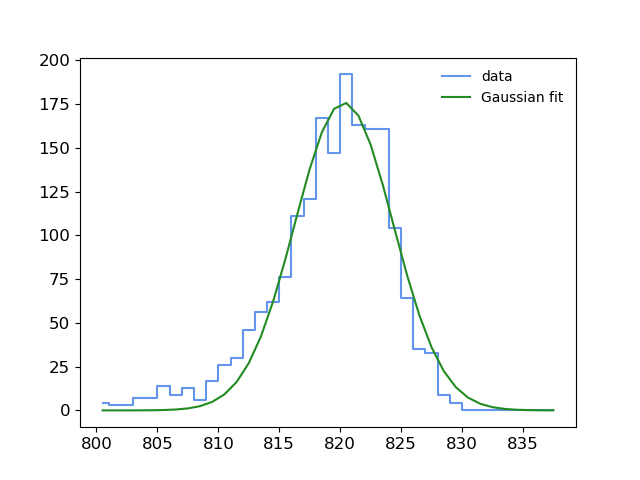

Estimated parameters:
 A = 175.87823, mu = 820.31233,  sigma = 4.03594 

Uncertainties in the estimated parameters: 
 σ²(A) = 30.72345, σ²(mu) = 0.02157, σ²(sigma) = 0.02157 

Covariance matrix: 
 [[3.07234508e+01 1.40604097e-06 4.70024090e-01]
 [1.40604097e-06 2.15720468e-02 3.17812040e-08]
 [4.70024090e-01 3.17812040e-08 2.15720509e-02]]


In [35]:
# Fitting the 4th peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Po216 = fittingFunctions.perform_Gaussian_fit(x=Th228_data.bin_centers, # your x data 
											  y=Th228_data.counts,           # your y data 
											  region_start=800,   # -> TODO <- Insert channel number from where to START fitting.
											  region_stop=838,    # -> TODO <- Insert channel number from where to STOP fitting.
											  mu_guess=820,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=190,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=20)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

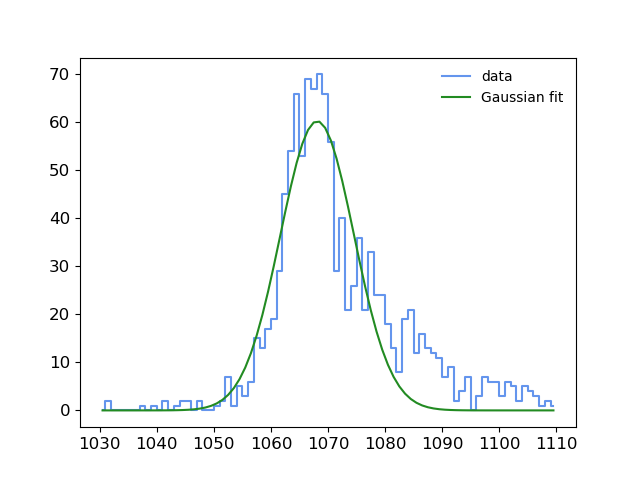

Estimated parameters:
 A = 60.26468, mu = 1068.10511,  sigma = 6.44946 

Uncertainties in the estimated parameters: 
 σ²(A) = 7.58681, σ²(mu) = 0.11587, σ²(sigma) = 0.11587 

Covariance matrix: 
 [[ 7.58680935e+00  1.33463208e-06 -5.41319422e-01]
 [ 1.33463208e-06  1.15869548e-01 -1.42837184e-07]
 [-5.41319422e-01 -1.42837184e-07  1.15869547e-01]]


In [36]:
# Fitting the 5th peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Po212 = fittingFunctions.perform_Gaussian_fit(x=Th228_data.bin_centers, # your x data 
											  y=Th228_data.counts,           # your y data 
											  region_start=1030,   # -> TODO <- Insert channel number from where to START fitting.
											  region_stop=1110,    # -> TODO <- Insert channel number from where to STOP fitting.
											  mu_guess=1067,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=80,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=20) 
#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

### Step 9: Create an energy calibration curve. 

Recall that the energy calibration is the linear dependence between the ADC channel number and the energies of the identified full-energy peaks. It is performed with a linear function.

A linear function looks like:
$$Energy = k \cdot Channel + m$$
where;
- $k$ determines the slope of the curve,
- $m$ determined the intersection of the y-axis.

Find calibration constants for Si detector: 

Alpha energies [MeV]: [5.42 5.68 6.28 6.78 8.78]
Fitted centroid values [ADC]: [ 653.07794006  686.37497945  760.33984786  820.31233369 1068.10511121]


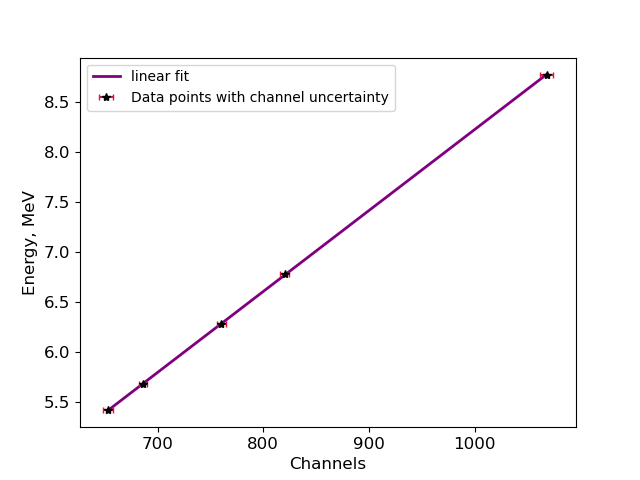

Estimated paramters (k, m) = (0.00811, 0.11925)


In [37]:
#First, lets put in the relevant alpha energies
#Information can be found from 232Th-chart.pdf
Table_E_1 = np.asarray([5.42])           # -> TODO <- Insert energy [MeV] of the first peak
Table_E_2 = np.asarray([5.68])           # -> TODO <- Insert energy [MeV] of the second peak
Table_E_3 = np.asarray([6.28])           # -> TODO <- Insert energy [MeV] of the third peak
Table_E_4 = np.asarray([6.78])           # -> TODO <- Insert energy [MeV] of the fourth peak
Table_E_5 = np.asarray([8.78])           # -> TODO <- Insert energy [MeV] of the fifth peak


#### NO NEED TO EDIT ####
Table_E = np.concatenate([Table_E_1,Table_E_2,Table_E_3,Table_E_4,Table_E_5]) #put all energies into one container 'Table_E' for ease of use
mu_peak1 = np.asarray([Th228.mu]) #save fitted centroid value
mu_peak2 = np.asarray([Ra224.mu]) #save fitted centroid value
mu_peak3 = np.asarray([Rn220.mu]) #save fitted centroid value
mu_peak4 = np.asarray([Po216.mu]) #save fitted centroid value
mu_peak5 = np.asarray([Po212.mu]) #save fitted centroid value

mu_calibration = np.concatenate([mu_peak1,mu_peak2,mu_peak3,mu_peak4,mu_peak5]) #put all fitted centroid values in one container 'mu_calibration' for ease of use

sigma_peak1 = np.asarray([Th228.sigma]) #save fitted centroid value
sigma_peak2 = np.asarray([Ra224.sigma]) #save fitted centroid value
sigma_peak3 = np.asarray([Rn220.sigma]) #save fitted centroid value
sigma_peak4 = np.asarray([Po216.sigma]) #save fitted centroid value
sigma_peak5 = np.asarray([Po212.sigma]) #save fitted centroid value

sigma_calibration = np.concatenate([sigma_peak1,sigma_peak2,sigma_peak3,sigma_peak4,sigma_peak5])

print(f'Alpha energies [MeV]: {Table_E}')
print(f'Fitted centroid values [ADC]: {mu_calibration}')
#########################

# Same as before, the linear function needs intial guess for the two paramters:
k_guess = 2 # -> intial guess for the slope of the curve
m_guess = 1 # -> initial guess for the intersection of the y-axis

#### NO NEED TO EDIT ####
# Perform the fit
estimates_NaI, covar_matrix = curve_fit(fittingFunctions.LineFunc, # name of the function - linear function in our case
										mu_calibration,            # our x data - peak centroids 
										Table_E,                   # our y data - energies
										p0 = [k_guess, m_guess])   # our initial guessesfor k and m parameters

k = estimates_NaI[0] #save fitted parameter 'k' 
m = estimates_NaI[1] #save fitted parameter 'm'
plt.figure() #make figure 
plt.plot(mu_calibration, fittingFunctions.LineFunc(mu_calibration, estimates_NaI[0], estimates_NaI[1]), color='purple', lw=2, label='linear fit') #plot the linear fit
#plt.scatter(mu_calibration, Table_E, s=100, c='black', marker='*', label='data points') #plot the fitted data
plt.errorbar(mu_calibration, Table_E, xerr=sigma_calibration, fmt='*', capsize=2, color='black', zorder=2, barsabove=False, ecolor='crimson', label='Data points with channel uncertainty')
plt.legend(loc='upper left') #set a legend and its position
plt.xlabel("Channels")       # set label for x-axis 
plt.ylabel("Energy, MeV")    # set label for y-axis 
plt.show()
print(f"Estimated paramters (k, m) = ({round(k, 5)}, {round(m, 5)})") #print the results of the fit to screen
#########################
plt.savefig('calibration.pdf')

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

### Step 10: Plot the calibrated data and check that the peaks have the correct energy.

In [38]:
#Execute to calibrate from ADC channels to Energy [MeV] for the two data sets.

#### NO NEED TO EDIT ####
Th228_data.calibrate(k,m) #calibrate the Th-228 spectra

#########################

Text(0, 0.5, 'Counts')

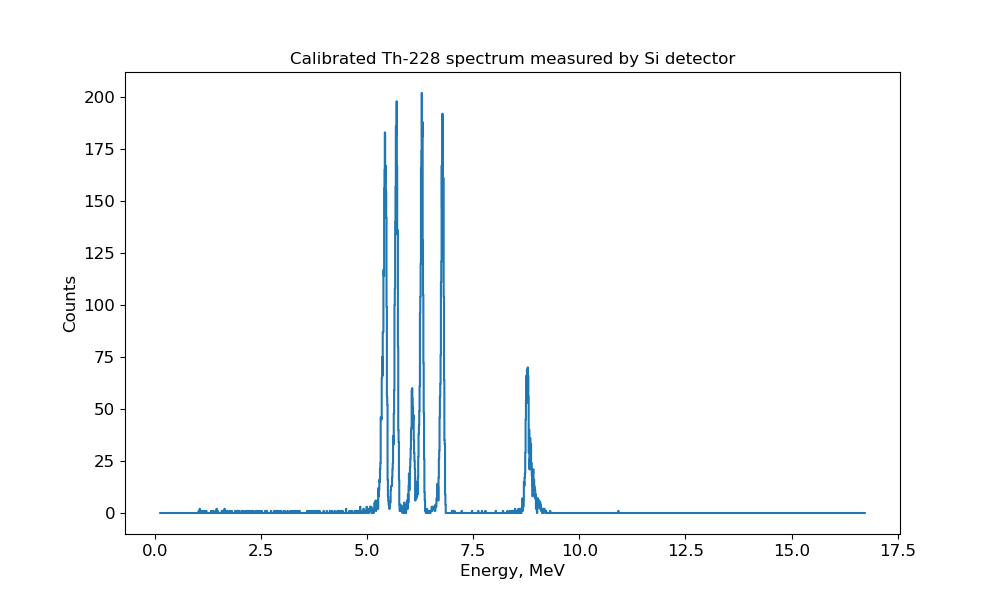

In [39]:
#Execute to make plot of calibrated Th-228 spectra

#### NO NEED TO EDIT ####
plt.figure(figsize=(10, 6))
# with the data read in with the first routine
plt.step(Th228_data.energy, Th228_data.counts, where='mid', label='step')
plt.title("Calibrated Th-228 spectrum measured by Si detector") # set title of the plot
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th228_calib_spectrum.png") #This is how you save the figure
#########################

## Task 2.3: Measure the concentration of radon gas

### Step 12: Read in the two measured spectra and calibrate

In [40]:
#Load your data files here:
Rn222_1 = MCA.load_spectrum("../data/better_radon_measurement_1.Spe") #-> TODO <- Insert the name of your data file. Source: Rn-222 ( first measurement)
Rn222_2 = MCA.load_spectrum("../data/better_radon_measurement_2.Spe") #-> TODO <- Insert the name of your data file. Source: Rn-222 (second measurement)

In [41]:
#Now we can use your previous calibration to calibrate this new spectra!

#### NO NEED TO EDIT ####
Rn222_1.calibrate(k, m)
Rn222_2.calibrate(k, m)
#########################

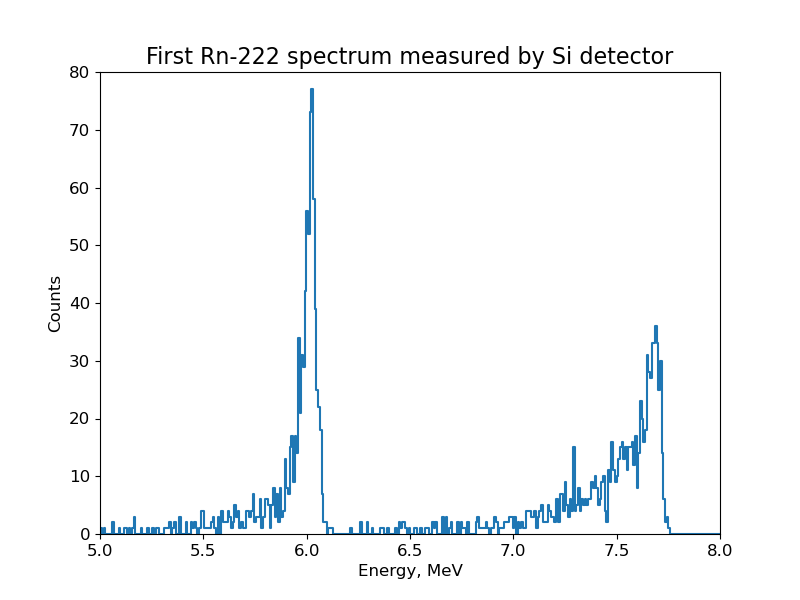

In [42]:
#Exectute to make a plot of your first calibrated Rn-222 spectra.

#### NO NEED TO EDIT ####
plt.figure(figsize=(8, 6)) #make figure
# with the data read in with the first routine
plt.step(Rn222_1.energy, Rn222_1.counts, where='mid', label='First Measurement')

plt.title("First Rn-222 spectrum measured by Si detector", fontsize=16) # set title of the plot
plt.xlabel("Energy, MeV")  # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.ylim(ymin=0, ymax=80) #-> TODO <- Might need to tune the axis scale [counts]
plt.xlim(5, 8)
plt.savefig("first_radon_measurement.pdf") #This is how you save the figure
#########################

### Step 13: Determine the counts of each peak

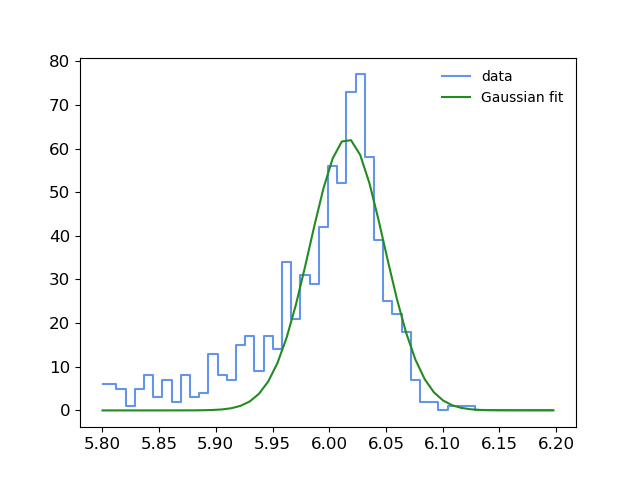

Estimated parameters:
 A = 62.25867, mu = 6.01575,  sigma = 0.03285 

Uncertainties in the estimated parameters: 
 σ²(A) = 11.14398, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.11439817e+01  1.06844008e-08 -3.92053561e-03]
 [ 1.06844008e-08  4.13782079e-06 -5.63636262e-12]
 [-3.92053561e-03 -5.63636262e-12  4.13782073e-06]]

 Area (intensity) of the first peak : 512.705422177281


In [43]:
# Fitting the 1st peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_1_peak1 = fittingFunctions.perform_Gaussian_fit(x=Rn222_1.energy, # your x data 
											  y=Rn222_1.counts,           # your y data 
											  region_start=5.8,   # -> TODO <- Insert energy [MeV] from where to START fitting.
											  region_stop=6.2,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
											  mu_guess=6,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=75,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=0.5)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the first peak : {}".format(Rn222_1_peak1.area()*bins))

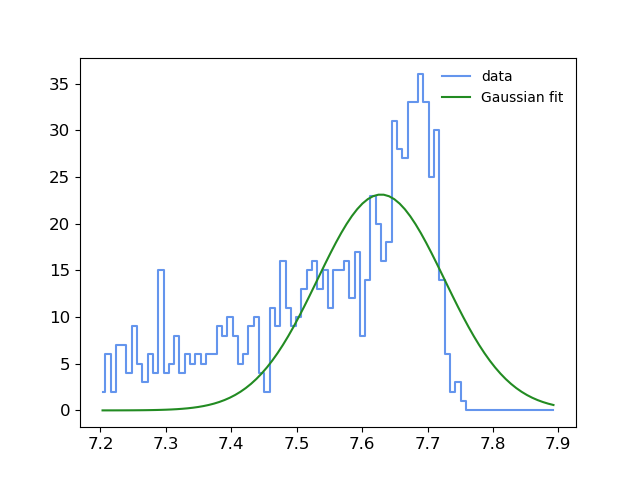

Estimated parameters:
 A = 23.13084, mu = 7.62890,  sigma = 0.09707 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.17921, σ²(mu) = 0.00007, σ²(sigma) = 0.00008 

Covariance matrix: 
 [[ 3.17921367e+00 -1.77557634e-05 -8.93043634e-03]
 [-1.77557634e-05  7.46083006e-05  1.70026644e-07]
 [-8.93043634e-03  1.70026644e-07  7.50199534e-05]]

 Area (intensity) of the second peak : 562.8312075638252


In [44]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_1_peak2 = fittingFunctions.perform_Gaussian_fit(x=Rn222_1.energy, # your x data 
											  y=Rn222_1.counts,           # your y data 
											  region_start=7.2,   # -> TODO <- Insert energy [MeV] from where to START fitting.
											  region_stop=7.9,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
											  mu_guess=7.7,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=50,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=0.5)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the second peak : {}".format(Rn222_1_peak2.area()*bins))

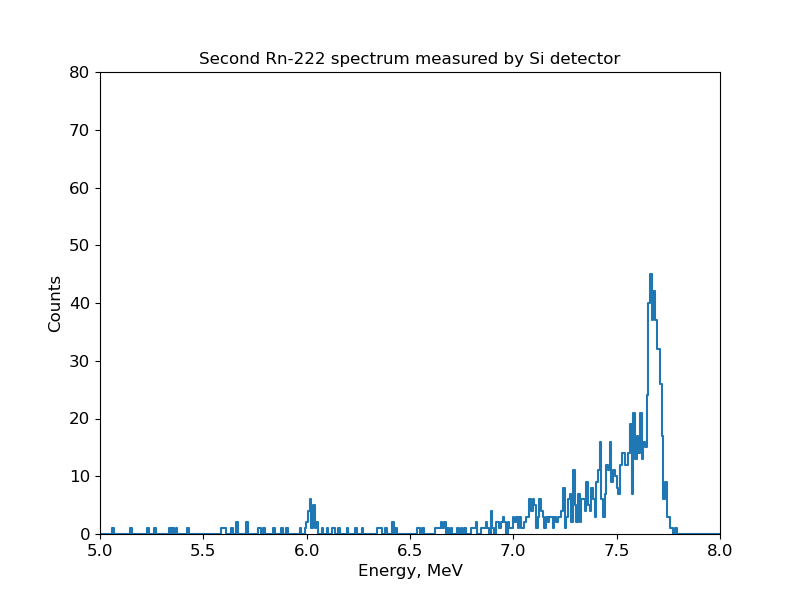

In [45]:
#Exectute to make a plot of your second calibrated Rn-222 spectra.

#### NO NEED TO EDIT ####
plt.figure(figsize=(8, 6)) #make figure
# with the data read in with the first routine
plt.step(Rn222_2.energy, Rn222_2.counts, where='mid', label='step')

plt.title("Second Rn-222 spectrum measured by Si detector") # set title of the plot
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.ylim(ymin= 0, ymax=80) #-> TODO <- Might need to tune the axis scale [Counts]
plt.xlim(xmin=5, xmax=8)
plt.savefig("second_radon_measurement.pdf") #This is how you save the figure
#########################

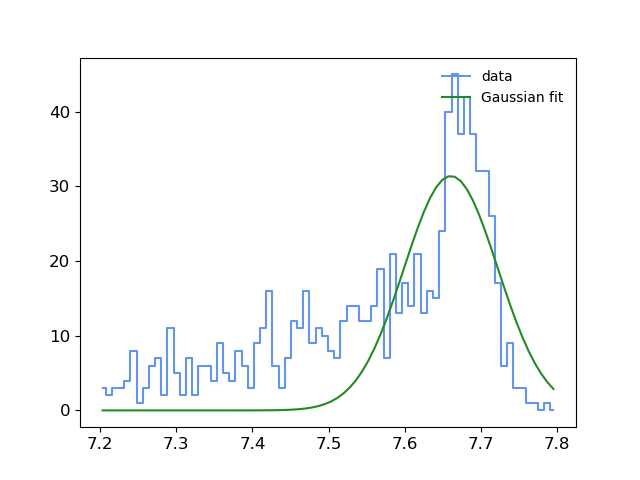

Estimated parameters:
 A = 31.39753, mu = 7.66056,  sigma = 0.06155 

Uncertainties in the estimated parameters: 
 σ²(A) = 7.04414, σ²(mu) = 0.00004, σ²(sigma) = 0.00004 

Covariance matrix: 
 [[ 7.04414245e+00 -1.53867730e-04  9.46372934e-03]
 [-1.53867730e-04  3.60415924e-05 -7.34254174e-07]
 [ 9.46372934e-03 -7.34254174e-07  3.74041932e-05]]

 Area (intensity) of the second peak : 484.41556254122


In [46]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_2_peak2 = fittingFunctions.perform_Gaussian_fit(x=Rn222_2.energy, # your x data 
											  y=Rn222_2.counts,           # your y data 
											  region_start=7.2,   # -> TODO <- Insert energy [MeV] from where to START fitting.
											  region_stop=7.8,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
											  mu_guess=7.6,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
											  A_guess=30,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
											  sigma_guess=0.6)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.
bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the second peak : {}".format(Rn222_2_peak2.area()*bins))

### Step 14: Calculate the concentration of radium decay products in collected sample 

Radium-226 decays into Radon-222 which is gaseous, this in turns decays and it is these decay products that pose a health risk

Historically these products were called RaA(Po-218), RaB(Pb-214), RaC(Bi-214), RaC'(Po-214). This is mentioned only to help should you want to try and follow the following calculation in detail as those suffixes were used to simplify variable naming

Section 1.5.5 in Nuclear physics : principles and applications - J.S. Lilley will help in understanding the following code.

In broad strokes, it is taking the known half lives and calculating how much of it is collected, how much decays in that time and then how the successive decay products feed into each other using the so-called Bateman equations.

The code is complicated, and not written in the most elegant way, but has been included for completeness, all the variables to be edited are above the `#### NO NEED TO EDIT ####`

In [7]:
collection_time = 3*60+10.2   #-> TODO <- Insert your timing [s]
transfer_time = 33.4     #-> TODO <- Insert your timing [s]
measurement_1_time = 5*60 + 0.98 #-> TODO <- Insert your timing [s]
decay_time = 10*60 + 0.31        #-> TODO <- Insert your timing [s]
measurement_2_time = 5*60 + 0.39 #-> TODO <- Insert your timing [s]

pump_flow = 1290      #-> TODO <- Insert your value [l/h] 

N_A1 = ufloat(513, np.sqrt(513))#513   #-> TODO <- Insert the contents/integral of first  peak from first measurment
N_C1 = ufloat(562, np.sqrt(562))#562  #-> TODO <- Insert the contents/integral of second peak from first measurment
N_C2 = ufloat(484, np.sqrt(484))#484  #-> TODO <- Insert the contents/integral of first  peak from second measurement

#### NO NEED TO EDIT ####
efficiency = 0.31
flow = pump_flow/1000/3600 # m3/s
t1_start = transfer_time
t1_stop = t1_start+measurement_1_time
t2_start = t1_stop+decay_time
t2_stop = t2_start+measurement_2_time
#relevant half lives
Po218_hl = 183  # [s]
Pb214_hl = 1608 # [s]
Bi214_hl = 1182 # [s]
#decay constants
lamda_A = np.log(2)/Po218_hl
lamda_B = np.log(2)/Pb214_hl
lamda_C = np.log(2)/Bi214_hl
#accumulated amounts
acc_A = 1-np.exp(-lamda_A*collection_time)
acc_B = 1-np.exp(-lamda_B*collection_time)
acc_C = 1-np.exp(-lamda_C*collection_time)
#fractional decay of components during measurment one
decay_A_1 = np.exp(-lamda_A*t1_start) - np.exp(-lamda_A*(t1_stop))
decay_B_1 = np.exp(-lamda_B*t1_start) - np.exp(-lamda_B*(t1_stop))
decay_C_1 = np.exp(-lamda_C*t1_start) - np.exp(-lamda_C*(t1_stop))                                                   
#fractional decay of components during measurment two
decay_A_2 = np.exp(-lamda_A*t2_start) - np.exp(-lamda_A*t2_stop)
decay_B_2 = np.exp(-lamda_B*t2_start) - np.exp(-lamda_B*t2_stop)
decay_C_2 = np.exp(-lamda_C*t2_start) - np.exp(-lamda_C*t2_stop)

Term12A = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_1 * acc_B)
Term12B = 1/lamda_B * 1/lamda_C * lamda_B/(lamda_B - lamda_C) * decay_C_1 * acc_C 

Term13A_1 = 1/lamda_A * (1/lamda_A * lamda_B/(lamda_B - lamda_A) * lamda_C/(lamda_C - lamda_A) * decay_A_1 * acc_A )
Term13B_1 = 1/lamda_A * 1/lamda_B * lamda_A/(lamda_A-lamda_B) * lamda_C/(lamda_C-lamda_B) * decay_B_1 * acc_B 
Term13C_1 = 1/lamda_A * 1/lamda_C * lamda_A/(lamda_A-lamda_C) * lamda_B/(lamda_B-lamda_C) * decay_C_1 * acc_C

Term13A_2 = 1/lamda_A * (1/lamda_A * lamda_B/(lamda_B - lamda_A) * lamda_C/(lamda_C - lamda_A) * decay_A_2 * acc_A )
Term13B_2 = 1/lamda_A * 1/lamda_B * lamda_A/(lamda_A-lamda_B) * lamda_C/(lamda_C-lamda_B) * decay_B_2 * acc_B 
Term13C_2 = 1/lamda_A * 1/lamda_C * lamda_A/(lamda_A-lamda_C) * lamda_B/(lamda_B-lamda_C) * decay_C_2 * acc_C

F11 = 1/lamda_C * 1/lamda_C * decay_C_1 * acc_C
F12 = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_1 * acc_B + 1/lamda_C * lamda_B/(lamda_B-lamda_C) * decay_C_1 * acc_C)
F13 = Term13A_1 + Term13B_1 + Term13C_1

F21 = 1/lamda_C * 1/lamda_C * decay_C_2 * acc_C
F22 = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_2 * acc_B + 1/lamda_C * lamda_B/(lamda_B-lamda_C) * decay_C_2 * acc_C)
F23 = Term13A_2 + Term13B_2 + Term13C_2

k_denom = F22 * F11 - F21 * F12
k_1 = 1/(flow * 1/lamda_A**2 * decay_A_1 * acc_A)
k_2 = k_1 * (F21 * F13 - F23 * F11)/k_denom
k_3 = -1/flow * F21/k_denom
k_4 = 1/flow * F11/k_denom
k_5 = k_1 * (F23 * F12 - F22 * F13)/k_denom
k_6 = 1/flow * F22/k_denom
k_7 = -1/flow * F12/k_denom

C_A = k_1 * N_A1/efficiency
C_B = (k_2 * C_A + k_3 * N_C1 + k_4 * N_C2)/efficiency
C_C = (k_5 * N_A1 + k_6 * N_C1 + k_7 * N_C2)/efficiency

print("Po-218 Activity =",C_A, "Bq/m^3")
print("Pb-214 Activity =",C_B, "Bq/m^3")
print("Bi-214 Activity =",C_C, "Bq/m^3")

Po-218 Activity = 215+/-10 Bq/m^3
Pb-214 Activity = 71+/-14 Bq/m^3
Bi-214 Activity = 93+/-6 Bq/m^3


**Question**: Why have some peaks dissapeared between the first and second measurement?


In [8]:
#### NO NEED TO EDIT ####

#Calculate the Equilibrium Equivalent Dose
Po218_E = 6.11
Pb214_E = 7.83
Bi214_E = 7.69 # actually energy of the proceeding 214Po decay as it's a beta decay followed quickly by alpha

# convert half life to lifetime and calculate amount of nuclei needed for 1Bq activity
potential_Po218 = Po218_hl/0.69 * (Po218_E+7.69) #second decay is short lived so included here
potential_Pb214 = Pb214_hl/0.69 * Pb214_E
potential_Bi214 = Bi214_hl/0.69 * Bi214_E

total_energy = potential_Po218+potential_Pb214+potential_Bi214 # MeV/Bq

#calculate activity concentrations
frac_Po218 = potential_Po218/total_energy
frac_Pb214 = potential_Pb214/total_energy
frac_Bi214 = potential_Bi214/total_energy


# weighting factors based on energy released per Bq of activity
C1 = frac_Po218
C2 = frac_Pb214
C3 = frac_Bi214

equilibrium_factor = 0.4 # value for indoors
#equilibrium_factor = 0.6 # value for outdoors

EEC = (C1 * C_A + C2 * C_B + C3 * C_C) / equilibrium_factor

print(EEC,"Bq/m^3")

236+/-14 Bq/m^3


The International Commission on Radiological Protection (ICRP)
Give a dose coefficient of  6.7 x 10^-6 mSv per Bq h m-3

**Question** Using this and the calculateed EEC, calculate the exposure over the course of one year should this be the air in your basement


In [9]:
time_indoors = 0.8 
Dose = 6.7/1000000 * EEC * 24*365*time_indoors
print(Dose,"mSv")

11.1+/-0.7 mSv


**Question** : How does this compare to the average background radiation in Sweden?

**Question**: What could be done to mitigate the risks involved?

# Part 3: Range of alpha particles in air

### Step 1: Determine the background 

In [50]:
## compute the background measurements
#bg = [counts_BG_1, counts_BG_2, counts_BG_3] #-> TODO <- add coma separated values for the BG counts measured
bg = [38, 34, 41] # 100 s per measurement

for i in range(0, len(bg)):
	bg[i] = ufloat(bg[i],sqrt(bg[i]))
bg = np.array(bg)
bg = np.average(bg)
print(f"Background counts {bg=:.2}")


Background counts bg=38+/-4


### Step 2: Measure the count of alpha particles from the source at various distances

It is known that the detector does not sit at $d_0=0\,\text{mm}$. For the sake of this measurements you can assume that the depth of the detector is $d_0=2.5\,\text{mm}$

The surface of the detector is quite sensitive so <font color='red'>DO NOT TRY TO MEASURE IT YOURSELVES.</font>


In [51]:
## Format d[mm], t(s), factor, exp.Counts #-> TODO <- add the counts measured for each distance
data = [
	[ 4.5,  60, 1.00, 1434],
	[ 6.5,  60, 1.51, 1142],
	[ 8.5,  60, 2.03, 956],
	[10.5,  60, 3.00, 780],
	[12.5,  60, 4.01, 500],
	[14.5,  60, 5.20, 339],
	[16.5,  60, 6.57, 37],
	[18.5,  60, 8.12, 31],
	[20.5,  60, 9.84, 22],
	[22.5,  60, 11.7, 30],
	[24.5,  60, 13.8, 26],
	[26.5, 100, 16.1, 41],
	[28.5, 100, 18.5, 50],
	[30.5, 100, 21.1, 39],
	[32.5, 100, 24.3, 44]
]

## Turn into a dataframe using some identifying strings
s_distance=r'$d$[mm]'
s_time= r't(s)'
s_factor=r'$F_\Omega$'
s_counts_raw=r'Counts raw'

s_counts=r'Counts - BG'
s_counts_corrected=r'CPS corrected'
df = pd.DataFrame(data, columns=[s_distance, s_time, s_factor, s_counts_raw])

## Get the uncertainties into the Counts and substract the background
df[s_counts] = [ufloat(x,sqrt(x))-bg for x in df[s_counts_raw]]
df[s_counts_corrected] = df[s_counts]*(1/df[s_time])*df[s_factor]
display(df)

## uncomment the following to have the output copy and paste ready ;-)
#print(df.to_latex(float_format="{:.6}".format, index=False, escape=False))

,$d$[mm],t(s),$F_\Omega$,Counts raw,Counts - BG,CPS corrected
0,4.5,60,1.00,1434,(1.40+/-0.04)e+03,23.3+/-0.6
1,6.5,60,1.51,1142,1104+/-34,27.8+/-0.9
2,8.5,60,2.03,956,918+/-31,31.1+/-1.1
3,10.5,60,3.00,780,742+/-28,37.1+/-1.4
4,12.5,60,4.01,500,462+/-23,30.9+/-1.5
5,14.5,60,5.20,339,301+/-19,26.1+/-1.6
6,16.5,60,6.57,37,-1+/-7,-0.1+/-0.8
7,18.5,60,8.12,31,-7+/-7,-0.9+/-0.9
8,20.5,60,9.84,22,-16+/-6,-2.6+/-1.0
9,22.5,60,11.70,30,-8+/-7,-1.5+/-1.3


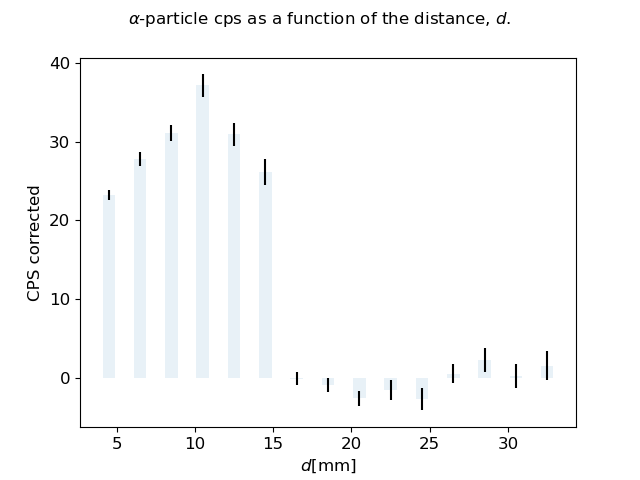

In [82]:
import matplotlib.pyplot as plt
#                       y,x
fig, axs = plt.subplots(1,1)

fig.suptitle(r'$\alpha$-particle cps as a function of the distance, $d$.')
plt.bar(df[s_distance],
		unumpy.nominal_values(df[s_counts_corrected]),
		yerr=unumpy.std_devs(df[s_counts_corrected]),
		label='Exp.',
		alpha=0.1
	   )
plt.xlabel(s_distance)
plt.ylabel(s_counts_corrected)
plt.savefig('alpha.pdf')

### Step 3: Compare the exp. value with the one from Bethe-Bloch and the parameterization

In [53]:
def Range_a_in_Air_Empirical(E):
	"""
	E in [MeV] or alphas
	
	returns range [cm]
	"""
	return 0.318*E**(3/2)

E = 5.48 # MeV
parameterized_range = Range_a_in_Air_Empirical(E)
print(f'Alpha of {E:.4} MeV has a range of {parameterized_range:.4} cm according to parameterization')

Alpha of 5.48 MeV has a range of 4.079 cm according to parameterization


<font color='red'> #-> TODO <- </font>

<font color='red'>THIS SECTION NEEDS TO BE DEVELOPED AS PART OF THE REPORT. IT DOES NOT RUN AS IS. 
	THIS IS JUST SOME SKELETON CODE</font>

From Lilley
$$
-\frac{dE}{dx} = \left(\frac{ze^2}{4\pi\epsilon_0}\right)^2\ \frac{4\pi Z\rho N_A}{Am_ev^2}\ \left[\ln{\left(\frac{2m_ev^2}{I}\right)} - \ln{\left(1-\beta^2\right)} - \beta^2\right]
$$

best coded as:

$$
-\frac{dE}{dx} = \left(\frac{e^2}{4\pi\epsilon_0}\right)^2\ 
\frac{4\pi z^2}{m_ec^2\beta^2}\ 
\frac{Z\rho N_A}{A}\ \left[\ln{\left(\frac{2m_ec^2\beta^2}{I}\right)} - \ln{\left(1-\beta^2\right)} - \beta^2\right]
$$

In [43]:
#-> TODO <-
#           Using a series of small distance steps (dx), using a loop find the energy loss (dE)
#           of an alpha particle until it is stopped => reaches an energy of 0.           
#           You can keep track the value of dE_dx in a list for plotting later

#-> TODO <-
#           Be creative and code what you need to get the range of an alpha particle.
#           Refer to the canvas page on Bethe-Bloch if you are unsure about your coding. 

def Bethe_Bloch(E, material):
	"""
	PLEASE CODE THIS YOURSELVES
	Projectile:
	  - E[MeV] 
	  - m0c2[MeV]
	  - z
	Target:
	  - A  [g/mol]
	  - Z  [e]
	  - rho[g/cm3]
	  - I [MeV]
	  
	SHOULD returns dE/dx in [MeV/cm] if you use the suggested units
	"""
	if material == 'air':
		Z = 14.46 # Atomic number of air
		A = 28.96 # g/mol Molar mass of air
		rho = 1.225e-3 # g/cm3 Density of air
		I = 8.6e-5 # MeV Average excitation energy of the electrons in air
	if material == 'gold':
		Z = 79 # Atomic number of gold
		A = 196.96657  # g/mol Molar mass of gold
		rho = 19.3 # g/cm3 Density of gold
		I = 7.9e-4 # MeV Average excitation energy of the electrons in gold
		
	z = 2 # atomic number for the particle
	mac2 = 3727 # MeV
	complicated_expression = 0.307075 # MeV cm2/g

	

	N_A = 6.02214086e26 # molecules/kg-mole
	mec2 = 0.511        # MeV
	e2_4pi_e0 = 1.4400  # MeV*fm

	# let's do some unit tweaking
	N_A  /= 1000        # 1/g
	mec2 /= 1           # MeV
	e2_4pi_e0 /= 1e15   # MeV*m
	e2_4pi_e0 *= 100    # MeV*cm

	beta2 = 1 - 1/(E/mac2 + 1)**2

	dE_dX = complicated_expression * z**2/beta2 * (Z * rho)/A * (np.log(2 * mec2 * beta2 / I) - np.log(1 - beta2) - beta2)
	
	return dE_dX

steps = 4500
def energy_per_cm(E_start, n, material, dx=0.001):
	energy = []
	brag = []
	E = E_start
	for i in range(n):
		dE_dx = Bethe_Bloch(E, material)
		E -= dE_dx*dx
		energy.append(E)
		brag.append(dE_dx)
	
	return np.array(energy), np.array(brag)

energy, brag = energy_per_cm(5.48, steps, 'air', dx=0.001)

x_list =np.arange(0,steps*0.001,0.001)
idx = np.argmin(np.abs(brag - 0.001))
print(round(x_list[idx],2), 'cm')


3.8 cm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


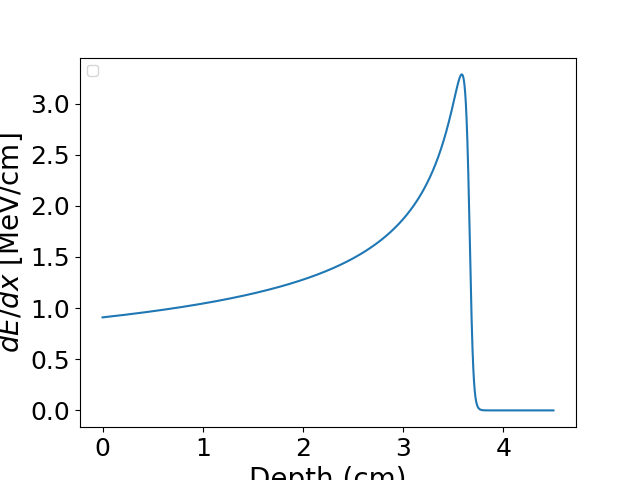

In [45]:
#### NO NEED TO EDIT ####
# turn those lists into array so we can do math with them =)

x_list =np.arange(0,steps*0.001,0.001)
fig, ax = plt.subplots(1,1)
#ax.plot(x_list, energy)
ax.plot(x_list, brag)
plt.legend(loc='upper left')
plt.xlabel(r'Depth (cm)', size=20)
plt.ylabel(r'$dE/dx$ [MeV/cm]', size=20)
#plt.ylabel(r'Energy [MeV]', size=20)
plt.xticks(size=18)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.yticks(size=18)
#plt.xlim(0, 0.0015)
plt.show()
plt.tight_layout()
plt.savefig("bethe_bloch_de_dx.pdf")
#plt.savefig("bethe_bloch_energy.pdf")
#### NO NEED TO EDIT ####

### Step 4: Gold and fingerprint thickness

In [84]:
#-> TODO <-
#           Be creative and code what you need to get the range of an alpha particle.
#           Refer to the canvas page on Bethe-Bloch if you are unsure about your coding.



def find_xcm(E_start, dx, length, travel):
	E = E_start
	steps = int(length/dx)
	x_list = np.arange(0, steps*dx, dx)
	for i in range(2000):
		energy, brag = energy_per_cm(E, steps,'air', dx=dx)
		idx = np.argmin(np.abs(brag - 0.001))
		if x_list[idx] >= travel:
			E -= 0.01
		elif x_list[idx] < travel:
			E += 0.01
		if abs(x_list[idx] - travel) <0.005:
			print('converged')
			print(f'E = {E} MeV')
			break
	return E

def gold_thickness(E_start, dx=0.0001, length=4.5, travel=2):
	steps = int(length/dx) # total number of steps
	x_list = np.arange(0, steps*dx, dx) # x_list of every step
	energy, brag = energy_per_cm(E_start, steps, 'gold', dx=dx) #finding the energy through gold
	idx = np.argmin(np.abs(energy - find_xcm(E_start, dx, length, travel)))
	thickness = x_list[idx] * 10000 # cm to um
	print(f"Gold thickness: {thickness} um")
	return thickness

gold_thickness(5.48, dx=0.00001, length=4.5, travel=1.55)

converged
E = 3.010000000000053 MeV
Gold thickness: 5.4 um


In [ ]:
converged
E = 3.010000000000053 MeV
Gold thickness: 5.4 um